# KMeans Algoritmasıyla Müşteri Segmentasyonu

In [118]:
#öncelikle bizim için gerekli olan kütüphaneleri tanımlıyoruz

In [119]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [120]:
#Ardından verisetimizin bulunduğu yolu path değişkenine atıyoruz.
#Peşinden atadığımız değişken içerisindeki csv dosyasını pandas ile okuyarak df adında verisetinin tutulduğu bir dataframe aktarıyoruz

In [121]:
path="C:/Users/HP/Desktop/Yapay Zeka Kursu Çalışmaları/data/CC GENERAL.csv"
df=pd.read_csv(path)

In [122]:
#df içeriği aşağıda görülmektedir.Sırasıyla sütun adlarını açıklayalım.

# CUST_ID : Kredi Kartı Sahibinin Kimliği (Kategorik)
# BALANCE: Alışveriş yapmak için hesaplarında kalan bakiye tutarı
# BALANCE_FREQUENCY : Bakiye ne sıklıkta güncellenir, 0 ile 1 arası puan (1 = sık güncellenir, 0 = sık güncellenmez)
# PURCHASES : Hesaptan yapılan satın alma tutarı
# ONEOFF_PURCHASES : Tek seferde yapılan maksimum satın alma tutarı
# INSTALLMENTS_PURCHASES : Taksitli alışveriş tutarı
# CASH_ADVANCE : Kullanıcı tarafından peşin verilen nakit
# PURCHASES_FREQUENCY : Satın almaların ne sıklıkta yapıldığı, 0 ile 1 arasında puan (1 = sık satın alınan, 0 = sık satın alınmayan)
# ONEOFF_PURCHASES_FREQUENCY : Satın almaların tek seferde ne sıklıkta gerçekleştiği (1 = sık satın alınan, 0 = sık satın alınmayan)
# PURCHASES_INSTALLMENTS_FREQUENCY : Taksitli alışverişlerin ne sıklıkla yapıldığı (1 = sık yapılır, 0 = sık yapılmaz)
# CASH_ADVANCE_FREQUENCY : Peşin ödemenin ne sıklıkla yapıldığı
# CASH_ADVANCE_TRX : "Gelişmiş Nakit" ile Yapılan İşlem Sayısı
# PURCHASES_TRX : Yapılan satın alma işlemlerinin sayısı
# CREDIT_LIMIT : Kullanıcı için Kredi Kartı Limiti
# PAYMENTS : Kullanıcı tarafından yapılan Ödeme Tutarı
# MINIMUM_PAYMENTS : Kullanıcı tarafından yapılan minimum ödeme tutarı
# PRC_FULL_PAYMENT : Kullanıcı tarafından ödenen tam ödemenin yüzdesi
# TENURE : Kullanıcı için kredi kartı hizmetinin süresi

In [123]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [124]:
df.shape#veri seti 18 sütun 8950 satırdan oluşur

(8950, 18)

In [125]:
# dataframe hakkında fikir almak için df.info() kullanıyoruz ve  detaylı içeriğine bakıyoruz

#Buna göre elimizdeki verisetinde 3 değişken tipi bulunduğu net bir şekilde anlaşılmaktadır.Bunlar sırasıyla "object","float64" ve "int64" tür.
#Alt kısmında hepsinden kaç tane olduğuda mevcuttur.
#Bunun dışında  MINIMUM_PAYMENTS ve CREDIT_LIMIT içerisinde nan değerler olduğu görülmektedir.

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [127]:
#Şimdi ise bütün değerlerin ortalamalarını,standart sapmalarıını,tekil olup olmamalarını vs. detaylı inceleyelim

In [128]:
df.describe(include = 'all').T #bütün sütunların detaylı dağılımını görelim.Transpozunu almamızın sebebi ise sütunları, satır yaparak daha net görebilmek adınadır

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,8950,8950,C10001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE,8950.0,NaN,NaN,NaN,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,NaN,NaN,NaN,0.877271,0.236904,0.0,0.888889,1.0,1.0,1.0
PURCHASES,8950.0,NaN,NaN,NaN,1003.204834,2136.634782,0.0,39.635,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.0,NaN,NaN,NaN,592.437371,1659.887917,0.0,0.0,38.0,577.405,40761.25
INSTALLMENTS_PURCHASES,8950.0,NaN,NaN,NaN,411.067645,904.338115,0.0,0.0,89.0,468.6375,22500.0
CASH_ADVANCE,8950.0,NaN,NaN,NaN,978.871112,2097.163877,0.0,0.0,0.0,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.490351,0.401371,0.0,0.083333,0.5,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.202458,0.298336,0.0,0.0,0.083333,0.3,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,NaN,NaN,NaN,0.364437,0.397448,0.0,0.0,0.166667,0.75,1.0


In [129]:
#Bu noktada CUST_ID' nin unique bir sütun olduğunu daha detaylı görmüş olduk.
#Bunun dışında veriseti içerisindeki tekrarlayan değerlerin olup olmadığına da bakalım.
#Eğer tekrarlayan değerler varsa onları unique bir hale getirmemiz gerekmektedir.

In [130]:
df.duplicated().sum() #tekrar eden değer yokmuş 

0

In [131]:
df.isna().sum() #nan olan sütunları daha net gördük

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [132]:
#Bunları kullanılacak modeli etkilememesi için ya fillna ile doldurmalıyız ya da sütunu kaldırmalıyız.Bizim için veri fazlalığı önemli olduğundan doldurmayı tercih ediyorum.

In [133]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True) #Bunları median değerleriyle doldurmayı tercih ettim.
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [134]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [135]:
#yukarıda artık nan değer olmadığı görülmektedir

In [136]:
data=df.drop(["CUST_ID"],axis=1) #verisetimizdeki sütun dağılımlarını detaylı görmek için geçici bir data içinde unique değer içeren sütunu kaldırdık
                                 #Bunu yapmalıydık çünkü bizim unique sütununu temizleyerek sayısal değerleri kullanmamız gereklidir.

In [137]:
data.head(5)#data adındaki yeni dataframede CUST_ID olmadığı görülmektedir

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [138]:
#Şimdi ise elimizdeki verilerin distplot ile  ayrı ayrı yoğunluklarına bakalım

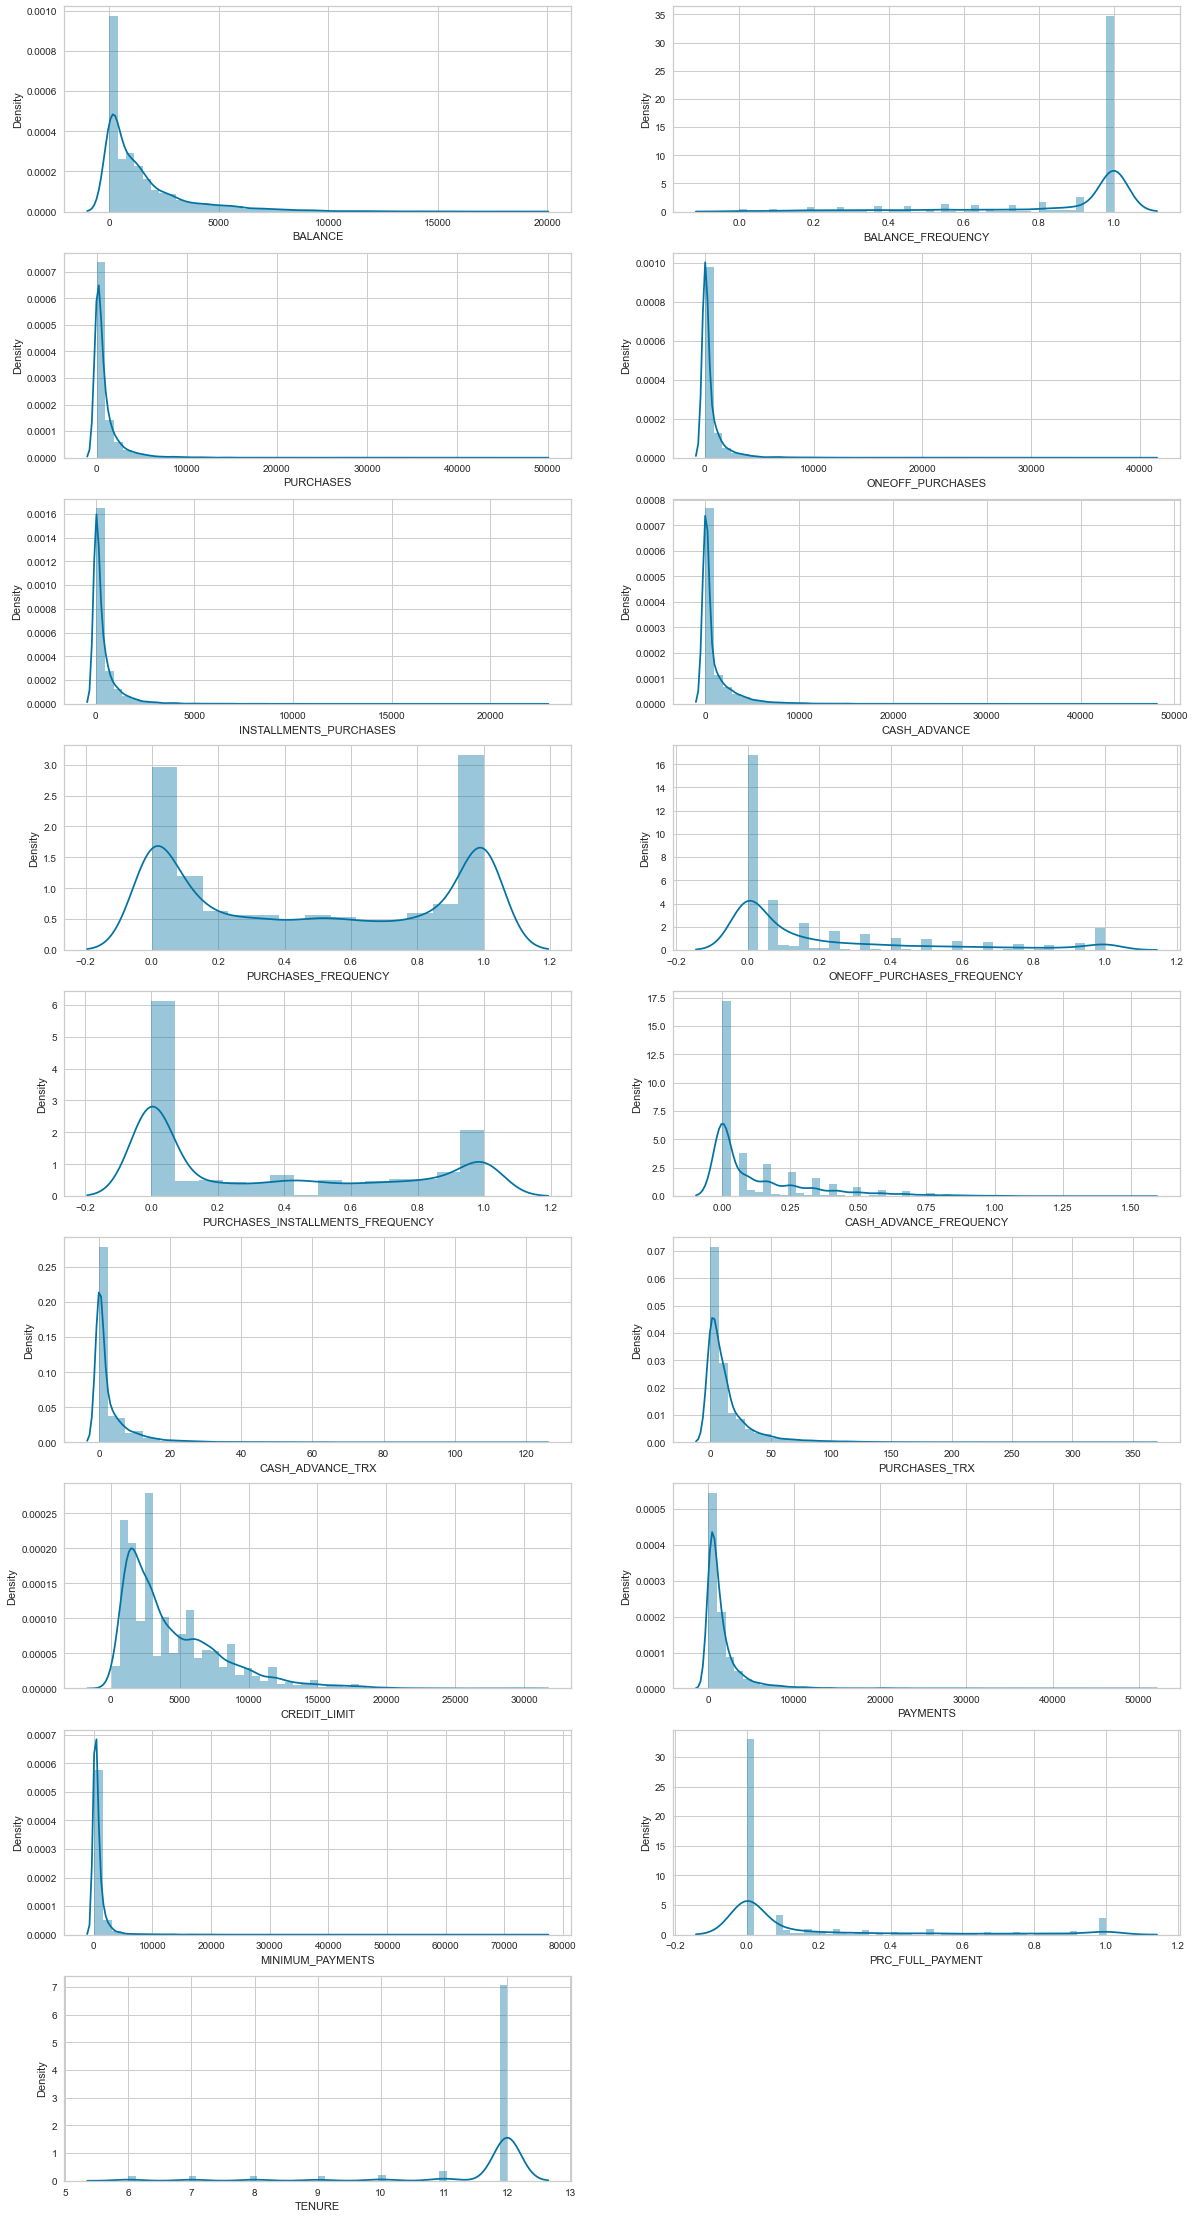

In [139]:
i=1
plt.figure(figsize= (20,40))
for col in data.columns:
    plt.subplot(9,2,i)
        
    sns.distplot(data[col])
    
    i=i+1
plt.show()

In [140]:
#Şimdi ise herbirinin çarpıklığına bakıyoruz.
#- ler sola doğru + lar ise sağa doğru bir çarpıklık olduğunu gösteriyor.
#0 olan değerler normal olduğunun göstergesidir.

In [141]:
for col in data.columns:
    print(col)
    print({data[col].skew()})

BALANCE
{2.393386042571806}
BALANCE_FREQUENCY
{-2.0232655185149078}
PURCHASES
{8.144269064554651}
ONEOFF_PURCHASES
{10.045082884700278}
INSTALLMENTS_PURCHASES
{7.299119908745641}
CASH_ADVANCE
{5.166609074074723}
PURCHASES_FREQUENCY
{0.06016423585803591}
ONEOFF_PURCHASES_FREQUENCY
{1.5356127835248519}
PURCHASES_INSTALLMENTS_FREQUENCY
{0.5092011649999882}
CASH_ADVANCE_FREQUENCY
{1.828686266477852}
CASH_ADVANCE_TRX
{5.721298203192298}
PURCHASES_TRX
{4.630655265932403}
CREDIT_LIMIT
{1.5226359501884323}
PAYMENTS
{5.907619794397562}
MINIMUM_PAYMENTS
{13.852446498665346}
PRC_FULL_PAYMENT
{1.942819940971858}
TENURE
{-2.9430172876199134}


In [142]:
#Çarpıklığı düzeltebilmek adına herbir sütunun karelerini alıyoruz

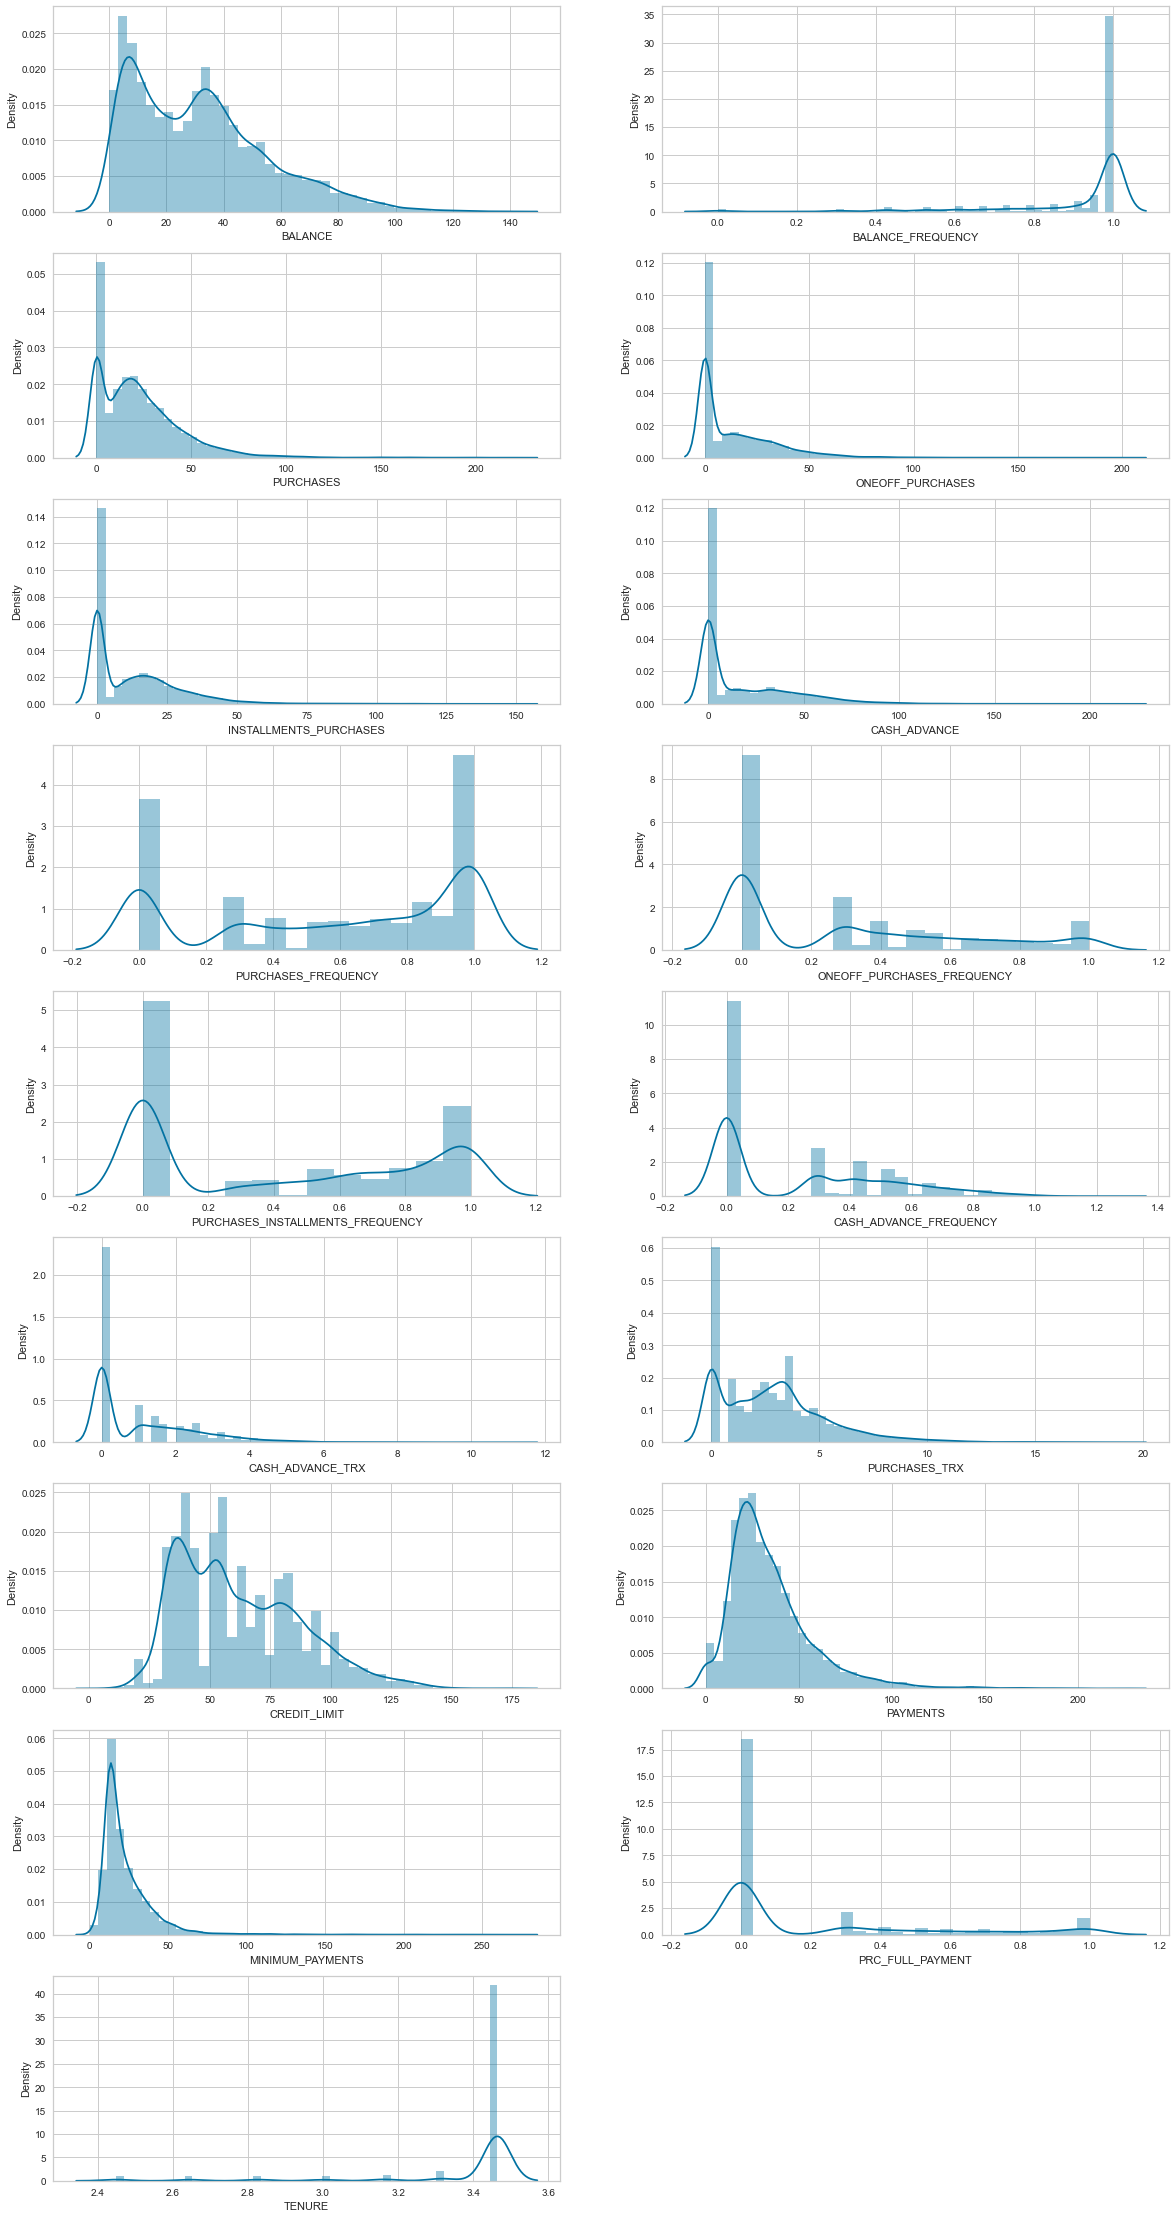

In [143]:
i=1
plt.figure(figsize=(20,40))
for col in data.columns:
    plt.subplot(9,2,i)
    data[col]= np.sqrt(data[col])
    sns.distplot(data[col])
    i=i+1
    
plt.show()

In [144]:
for col in data.columns:
    print(col)
    print({data[col].skew()})

BALANCE
{0.829497857072557}
BALANCE_FREQUENCY
{-2.8194948567414535}
PURCHASES
{1.7307522561530275}
ONEOFF_PURCHASES
{2.129460280033642}
INSTALLMENTS_PURCHASES
{1.5469393842026964}
CASH_ADVANCE
{1.4861590004379295}
PURCHASES_FREQUENCY
{-0.4218717893673732}
ONEOFF_PURCHASES_FREQUENCY
{0.7246072093111359}
PURCHASES_INSTALLMENTS_FREQUENCY
{0.13040915275372258}
CASH_ADVANCE_FREQUENCY
{0.7069756991977079}
CASH_ADVANCE_TRX
{1.417779463874218}
PURCHASES_TRX
{1.1857567220241383}
CREDIT_LIMIT
{0.6810872973244644}
PAYMENTS
{1.9515351600398658}
MINIMUM_PAYMENTS
{3.875507926615941}
PRC_FULL_PAYMENT
{1.2972800159306526}
TENURE
{-3.064332127759308}


In [145]:
#Yukarıda da görüldüğü gibi çarpıklıklar daha da iyi duruma getirildi

In [146]:
#Aykırı değerler, örnek veri kümesinin genel modelinden farklı olan gözlemlerdir. 
#Wikipedia bunu 'diğer gözlemlerden uzak bir gözlem noktası' olarak tanımlıyor. 
#ML algoritmaları aykırı değerlerin varlığında iyi çalışmaz.
#Şimdi, verilen veri setimizin bir kutu grafiği kullanarak herhangi bir aykırı değer içerip içermediğini görelim.

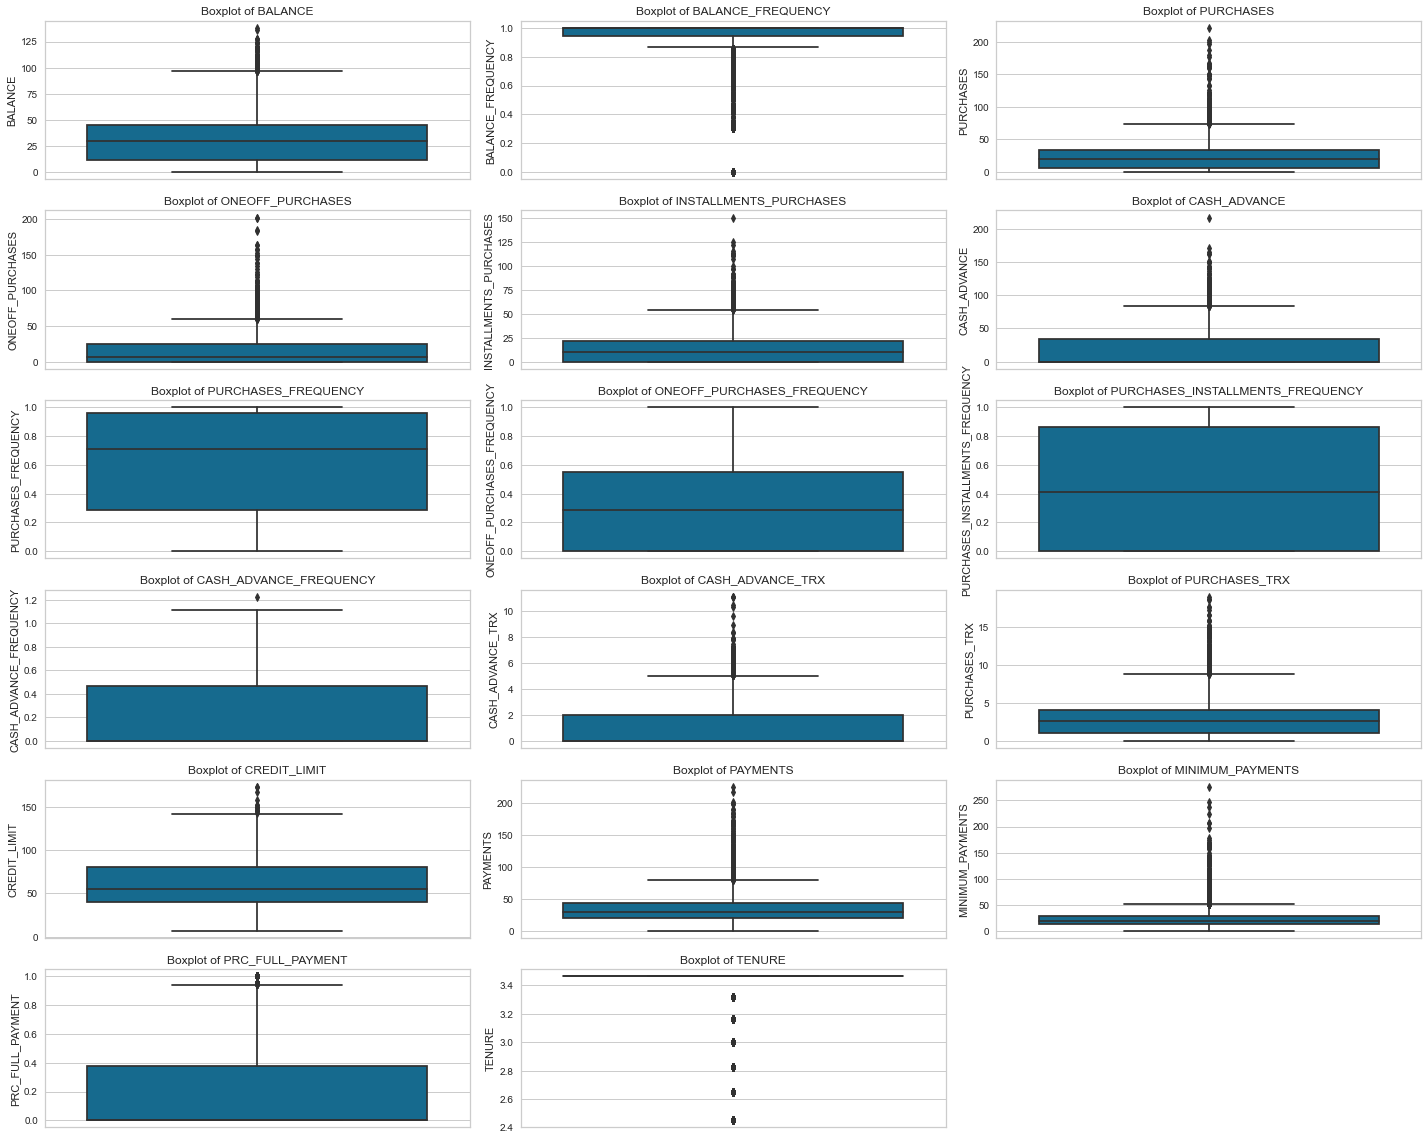

In [147]:
plt.figure(figsize = (20,16))
Features = data.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = data[Features[i]], data = data)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [148]:

#Çeyreklerini ve çeyrekler arası aralığını (IQR) kullanarak her özellik için aykırı değerleri buluyoruz
#Bir değer, (birinci çeyrek - 1.5 IQR) değerinden küçük veya (üçüncü çeyrek + 1.5 IQR) değerinden büyükse aykırı değer olarak kabul edilir.

#Aykırı Değerler, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY dışındaki tüm alanlarda mevcuttur.

In [149]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [150]:
Feature_list = data.columns
for i in Feature_list:
    lr, ur = detect_outliers(data[i])
    data[i] = np.where(data[i] > ur, ur,data[i])
    data[i] = np.where(data[i] < lr, lr,data[i])

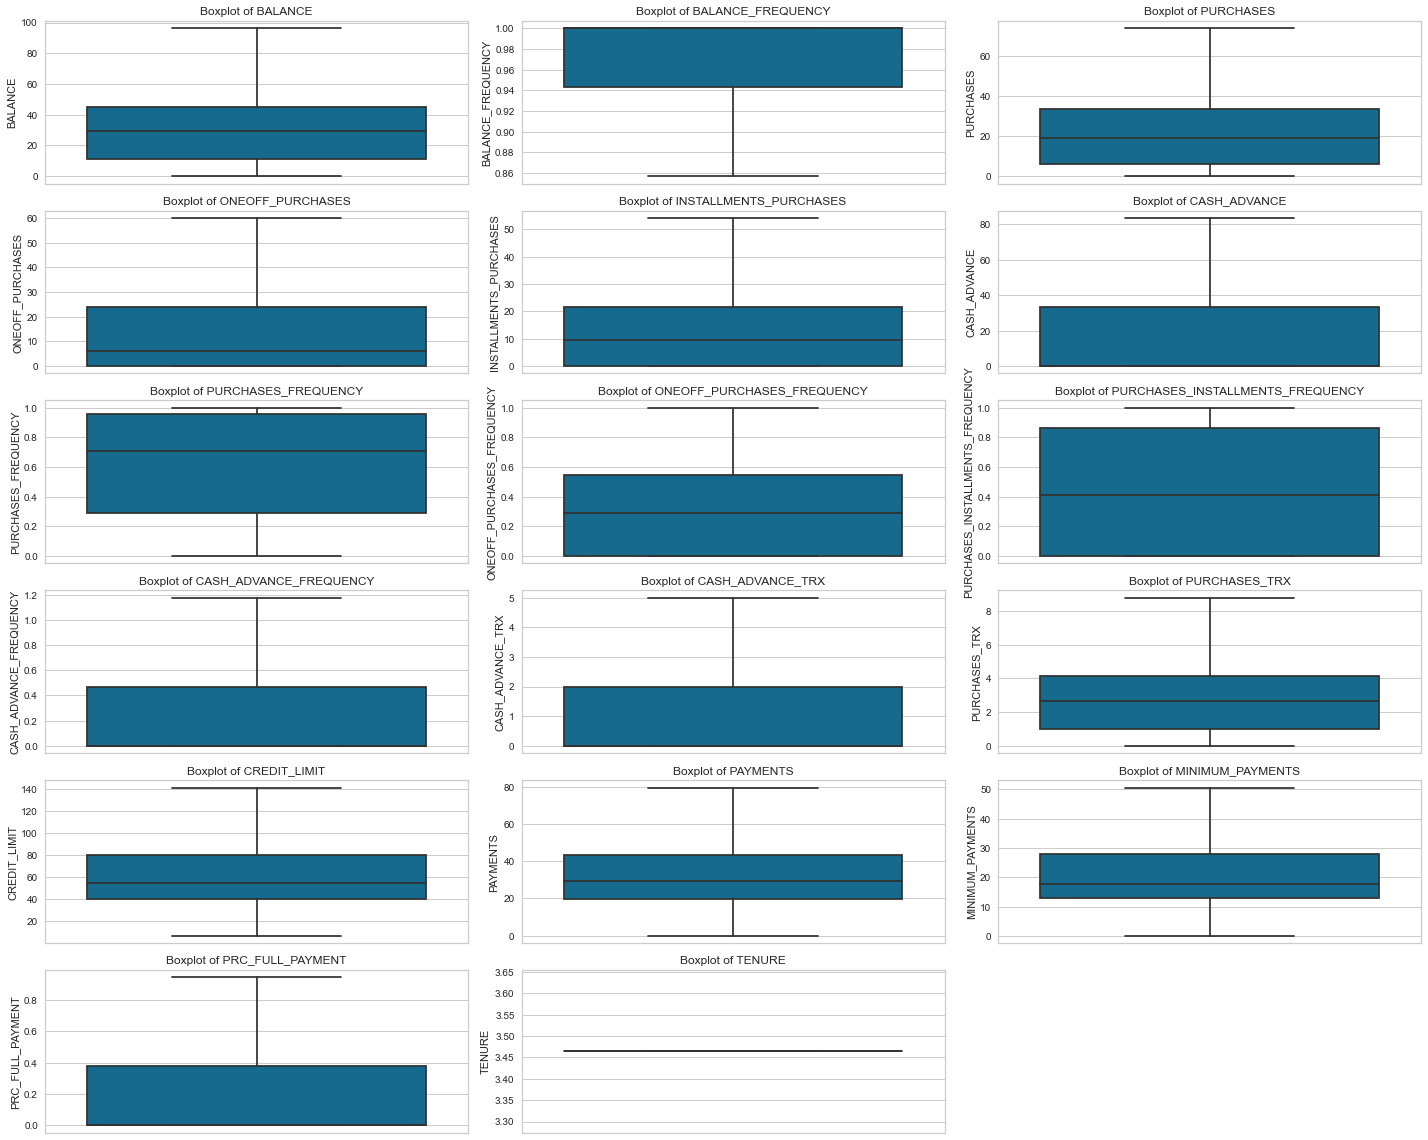

In [151]:
plt.figure(figsize = (20,16))
Features = data.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = data[Features[i]], data = data)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [152]:
features=data.columns
def outliers(df, features):
    """Count the number of outliers for each feature using the IQR"""
    num_outliers = []
    pct_outliers = []
    total_rows = []
    interquartile_range = []
    for i in features:
        Q1 = df[i].quantile(.25)
        Q3 = df[i].quantile(.75)
        IQR = Q3 - Q1
        outliers = len(df[(df[i] < (Q1-1.5*IQR)) | (df[i] > (Q3+1.5*IQR))])
        rows = len(df[i])
        pct = outliers/rows
        interquartile_range.append(IQR)
        num_outliers.append(outliers)
        pct_outliers.append(pct)
        total_rows.append(rows)
        
    count_outliers = pd.DataFrame({'Feature': features
                               , 'Num_Outliers': num_outliers
                                , 'Percent_Outliers': pct_outliers
                                , 'IQR': interquartile_range
                               , 'Total_Rows': total_rows}).sort_values('Percent_Outliers', ascending=False)
    return count_outliers

count_outliers = outliers(df=data, features=features)
count_outliers

,Feature,Num_Outliers,Percent_Outliers,IQR,Total_Rows
0,BALANCE,0,0.0,33.996461,8950
9,CASH_ADVANCE_FREQUENCY,0,0.0,0.471404,8950
15,PRC_FULL_PAYMENT,0,0.0,0.377964,8950
14,MINIMUM_PAYMENTS,0,0.0,15.012791,8950
13,PAYMENTS,0,0.0,24.024559,8950
12,CREDIT_LIMIT,0,0.0,40.622577,8950
11,PURCHASES_TRX,0,0.0,3.123106,8950
10,CASH_ADVANCE_TRX,0,0.0,2.000000,8950
8,PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0,0.866025,8950
1,BALANCE_FREQUENCY,0,0.0,0.057191,8950


In [154]:
#Standard Scaler ile verisetinin normalizasyonunu gerçekleştiririz
#Ayrıca daha önce düşürdüğümüz sütunu normalizasyonun yapıldığı sütunlarla birleştiririz

In [155]:
from sklearn.preprocessing import StandardScaler
# Scale the features
X = data[features]
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns, index=X.index)
df_scaled = pd.concat([df['CUST_ID'], X_scaled], axis=1)

In [156]:
df_scaled

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-1.089929,-1.048023,-0.636619,-0.790217,-0.205795,-0.758783,-0.455097,-0.881832,-0.350094,-0.861384,-0.797248,-0.600287,-1.215124,-1.006161,-0.831656,-0.640866,-1.0
1,C10002,1.074913,-0.194845,-1.135464,-0.790217,-0.880786,2.608813,-1.511903,-0.881832,-1.040015,0.933817,0.672897,-1.203216,0.858450,1.594744,0.910979,0.816400,-1.0
2,C10003,0.788587,0.616638,0.284669,0.819447,-0.880786,-0.758783,1.076731,2.081316,-1.040015,-0.861384,-0.797248,0.273653,0.975452,-0.446028,0.269955,-0.640866,-1.0
3,C10004,0.394969,-1.876490,0.841926,1.451076,-0.880786,-0.156934,-0.764630,-0.026447,-1.040015,0.175074,-0.062176,-0.776881,0.975452,-1.747350,-0.343720,-0.640866,-1.0
4,C10005,-0.132458,0.616638,-0.931172,-0.558660,-0.880786,-0.758783,-0.764630,-0.026447,-1.040015,-0.861384,-0.797248,-0.776881,-1.094868,-0.388448,-0.512484,-0.640866,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,-1.135534,0.616638,-0.264044,-0.790217,0.298338,-0.758783,1.076731,-0.881832,1.141709,-0.861384,-0.797248,-0.158912,-1.215124,-0.805884,-1.232833,1.545034,-1.0
8946,C19187,-1.176855,0.616638,-0.250853,-0.790217,0.316187,-0.758783,1.076731,-0.881832,1.141709,-0.861384,-0.797248,-0.158912,-1.215124,-0.880764,-0.343720,-0.640866,-1.0
8947,C19188,-1.157130,-0.902655,-0.521737,-0.790217,-0.050348,-0.758783,0.851185,-0.881832,0.911379,-0.861384,-0.797248,-0.249901,-1.215124,-1.276987,-1.059147,0.904799,-1.0
8948,C19189,-1.207537,-0.902655,-1.135464,-0.790217,-0.880786,-0.505110,-1.511903,-0.881832,-1.040015,0.604393,0.242301,-1.203216,-1.584157,-1.369123,-1.193286,0.904799,-1.0


In [157]:
df_scaled[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [158]:
#df_scaled içindeki verilerin sırasıyla ortalamasına,ortanca değerine,minimum ve maximum değerlerine bakalım

In [159]:
(df_scaled[features].describe().T
     [['mean', '50%', 'min', 'max']]
     .rename(columns={'50%': 'median'})
     .style.background_gradient(cmap = "twilight_shifted"))

,mean,median,min,max
BALANCE,-0.000000,-0.091168,-1.365752,2.788282
BALANCE_FREQUENCY,-0.000000,0.616638,-1.876490,0.616638
PURCHASES,-0.000000,-0.164700,-1.135464,2.636437
ONEOFF_PURCHASES,-0.000000,-0.433364,-0.790217,2.687369
INSTALLMENTS_PURCHASES,0.000000,-0.228829,-0.880786,2.859304
CASH_ADVANCE,-0.000000,-0.758783,-0.758783,2.741680
PURCHASES_FREQUENCY,-0.000000,0.318537,-1.511903,1.076731
ONEOFF_PURCHASES_FREQUENCY,-0.000000,-0.026447,-0.881832,2.081316
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,-0.064317,-1.040015,1.349944
CASH_ADVANCE_FREQUENCY,0.000000,-0.861384,-0.861384,3.369944


### BOOTSTRAP

In [160]:
#Bootstrap, bir değişkenin popülasyon ortalamasını tahmin etmek için kullanılan bir tekniktir. Bunu, verileri değiştirerek tekrar tekrar örnekleyerek ve her örnek için ortalamayı kaydederek yapar. 
#Tahmini popülasyon ortalaması, tüm örnek ortalamaların ortalamasıdır.

In [161]:
# Bootstrap sampling
samples = 1000
est_popu_means = {}
boot = []
for a in features:
    for b in range(samples):
        c = df[a].sample(frac = 0.33, random_state = 1).mean()
        boot.append(c)
    p_mean = sum(boot)/len(boot)
    est_popu_means[a] = p_mean
    boot.clear()

# Mean of each feature in the dataset
sampling_mean = []
for i in features:
    x = data[i].mean()
    sampling_mean.append(x)

df_means = pd.DataFrame({'Feature': list(est_popu_means.keys())
                       , 'Bootstrap_Mean': list(est_popu_means.values())
                       , 'Mean_in_dataset': sampling_mean})

df_means

,Feature,Bootstrap_Mean,Mean_in_dataset
0,BALANCE,1544.925802,31.666943
1,BALANCE_FREQUENCY,0.880153,0.964637
2,PURCHASES,1029.234242,22.232166
3,ONEOFF_PURCHASES,614.426114,13.650498
4,INSTALLMENTS_PURCHASES,414.974506,12.745202
5,CASH_ADVANCE,939.023397,18.085885
6,PURCHASES_FREQUENCY,0.496370,0.584054
7,ONEOFF_PURCHASES_FREQUENCY,0.198057,0.297600
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.370166,0.435160
9,CASH_ADVANCE_FREQUENCY,0.132016,0.239913


In [162]:
#Her özelliğin dağılımını görselleştirmek için bir histogram kullanalım.
## Bootstrap sampling tahmini popülasyon ortalamasını, belirtmek için histograma dikey bir çizgi ekleyelim

BALANCE
Bootstrap mean: 1544.9258020701038


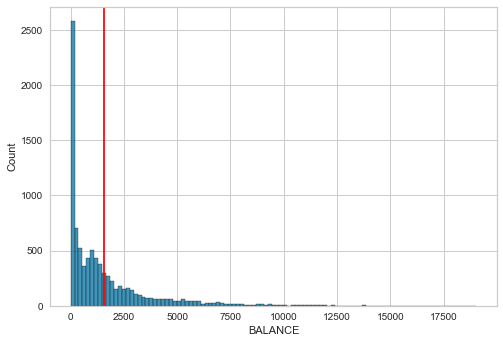

BALANCE_FREQUENCY
Bootstrap mean: 0.8801531983750754


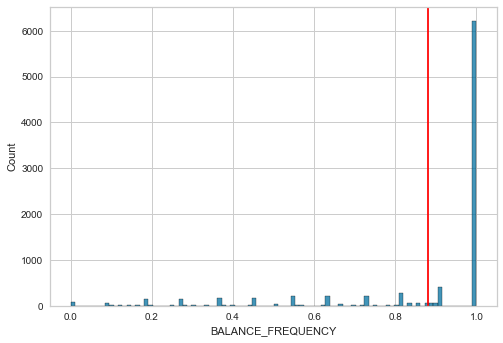

PURCHASES
Bootstrap mean: 1029.2342417061789


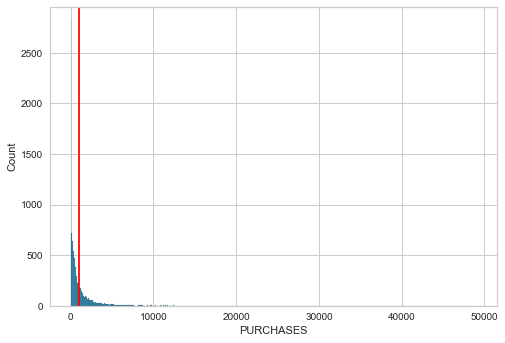

ONEOFF_PURCHASES
Bootstrap mean: 614.4261137440737


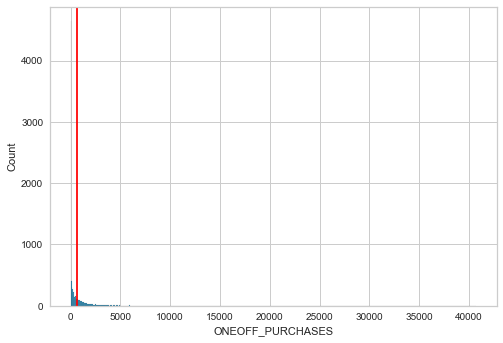

INSTALLMENTS_PURCHASES
Bootstrap mean: 414.9745057549034


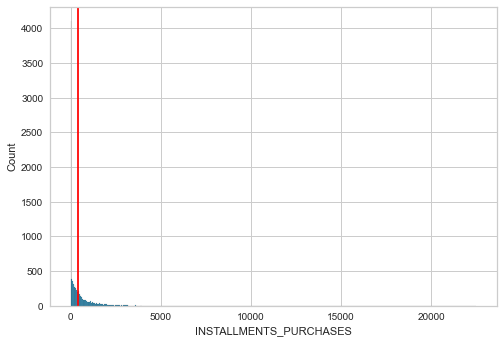

CASH_ADVANCE
Bootstrap mean: 939.0233965822512


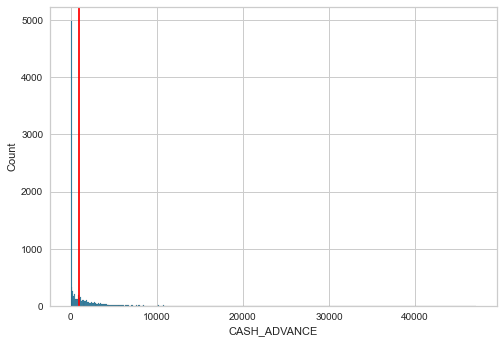

PURCHASES_FREQUENCY
Bootstrap mean: 0.49637017907922376


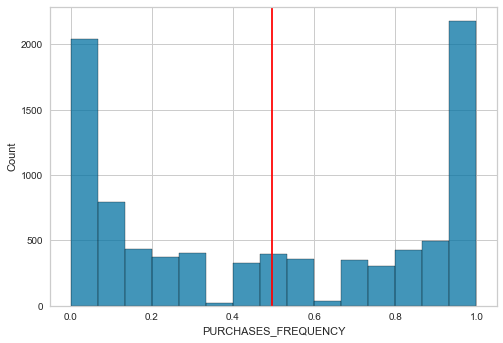

ONEOFF_PURCHASES_FREQUENCY
Bootstrap mean: 0.19805704468517663


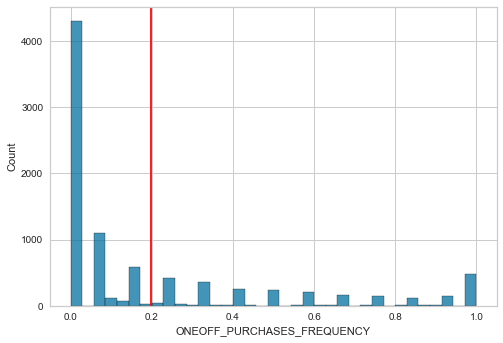

PURCHASES_INSTALLMENTS_FREQUENCY
Bootstrap mean: 0.37016616418416426


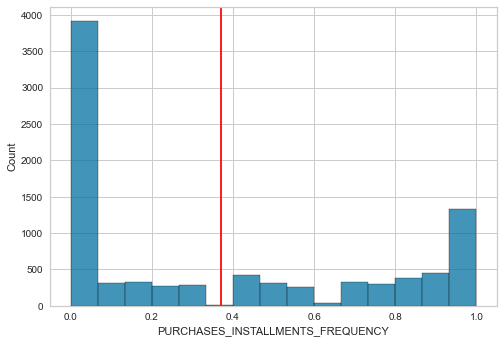

CASH_ADVANCE_FREQUENCY
Bootstrap mean: 0.13201607278266547


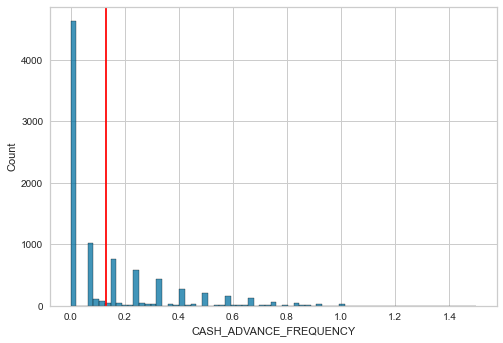

CASH_ADVANCE_TRX
Bootstrap mean: 3.113067027758926


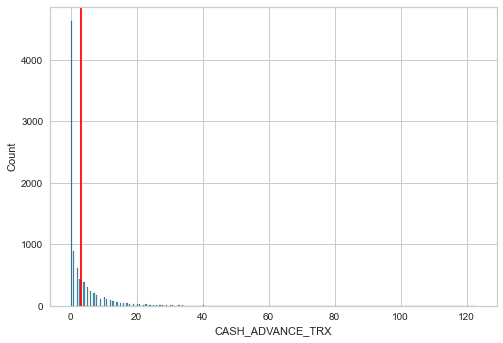

PURCHASES_TRX
Bootstrap mean: 14.807718348002306


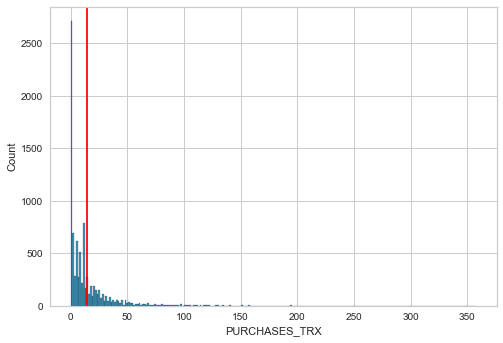

CREDIT_LIMIT
Bootstrap mean: 4538.437523508847


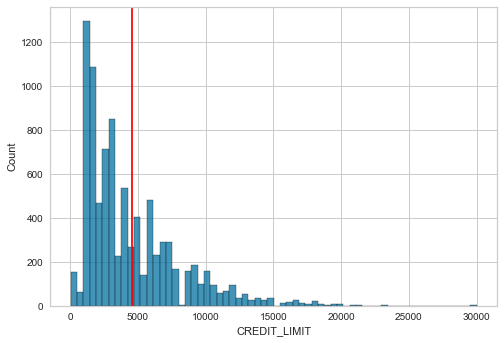

PAYMENTS
Bootstrap mean: 1742.0113839796504


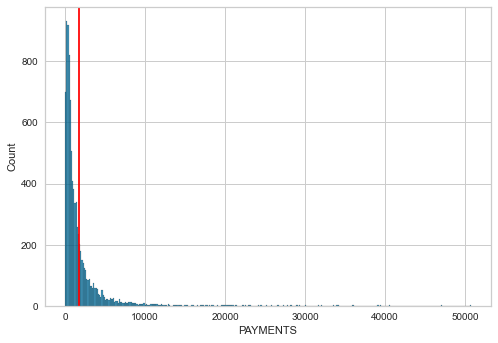

MINIMUM_PAYMENTS
Bootstrap mean: 887.718778012875


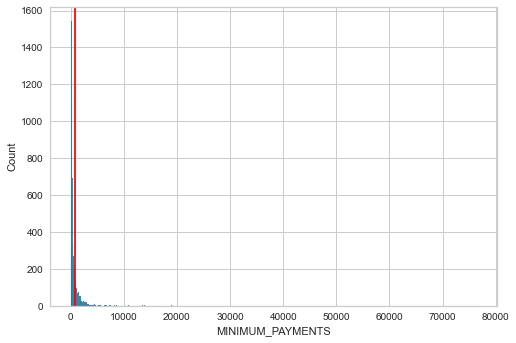

PRC_FULL_PAYMENT
Bootstrap mean: 0.16276787542315654


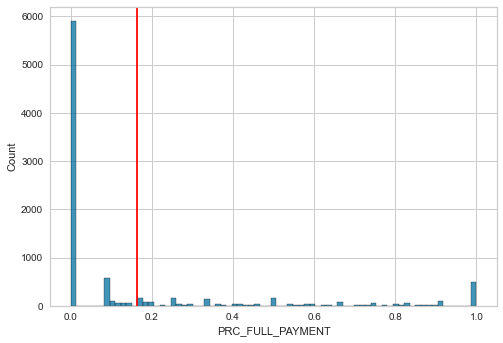

TENURE
Bootstrap mean: 11.515910629654666


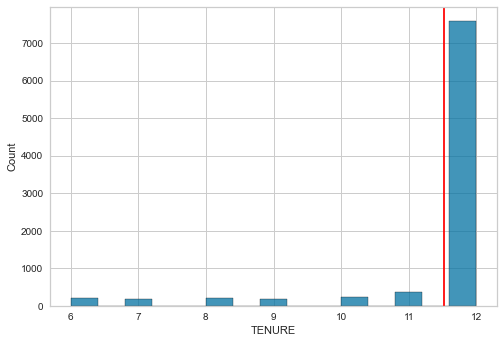

In [163]:
for i in features:
    boot_mean = df_means.loc[df_means['Feature'] == i, 'Bootstrap_Mean'].iloc[0]
    print(i)
    print('Bootstrap mean:', boot_mean)
    sns.histplot(df[i])
    plt.axvline(boot_mean, color = 'red')
    plt.show()

In [164]:
#Kırmızı çizgi popülasyon ortalamasını gösterir

### Kolerasyon

In [165]:
#Özellikler normal dağılmadığından spearman correlation  kullanırız. Spearman correlation , değişkenler arasındaki ilişkiyi ölçmek için sıraları kullanır ve verilerin normal olarak dağıtılmasını gerektirmez.

In [166]:
#Verilerin birbiriyle fazla ilişkili olması, analizimizi saptırabilir. 
#Bu yüzden korelasyonuna bakıyoruz.


In [167]:
spearman_corr = df_scaled[features].corr(method = 'spearman')
spearman_corr.style.background_gradient(cmap = 'coolwarm')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.534287,0.006354,0.145497,-0.090079,0.565869,-0.145226,0.119902,-0.144303,0.543955,0.549293,-0.046568,0.371854,0.431481,0.871545,-0.484132,nan
BALANCE_FREQUENCY,0.534287,1.000000,0.141427,0.131346,0.122159,0.133467,0.197870,0.155264,0.149420,0.173463,0.172748,0.196990,0.103950,0.197711,0.474295,-0.186428,nan
PURCHASES,0.006354,0.141427,1.000000,0.751127,0.705747,-0.384762,0.794596,0.692700,0.605866,-0.391134,-0.384158,0.885162,0.260632,0.394691,-0.014528,0.238104,nan
ONEOFF_PURCHASES,0.145497,0.131346,0.751127,1.000000,0.200394,-0.184589,0.423672,0.952411,0.117206,-0.179297,-0.175379,0.589898,0.304422,0.363143,0.066554,0.048701,nan
INSTALLMENTS_PURCHASES,-0.090079,0.122159,0.705747,0.200394,1.000000,-0.356875,0.786476,0.185443,0.923450,-0.366053,-0.357472,0.784270,0.123374,0.238389,-0.056637,0.276667,nan
CASH_ADVANCE,0.565869,0.133467,-0.384762,-0.184589,-0.356875,1.000000,-0.453708,-0.188841,-0.378258,0.940720,0.951780,-0.408224,0.162627,0.257007,0.477012,-0.265923,nan
PURCHASES_FREQUENCY,-0.145226,0.197870,0.794596,0.423672,0.786476,-0.453708,1.000000,0.462957,0.851551,-0.452967,-0.446507,0.923611,0.104031,0.172017,-0.107315,0.292962,nan
ONEOFF_PURCHASES_FREQUENCY,0.119902,0.155264,0.692700,0.952411,0.185443,-0.188841,0.462957,1.000000,0.112436,-0.176216,-0.174226,0.606508,0.282188,0.320547,0.048225,0.061448,nan
PURCHASES_INSTALLMENTS_FREQUENCY,-0.144303,0.149420,0.605866,0.117206,0.923450,-0.378258,0.851551,0.112436,1.000000,-0.381854,-0.374147,0.780697,0.047377,0.120719,-0.087790,0.259536,nan
CASH_ADVANCE_FREQUENCY,0.543955,0.173463,-0.391134,-0.179297,-0.366053,0.940720,-0.452967,-0.176216,-0.381854,1.000000,0.983411,-0.407293,0.088472,0.202700,0.453256,-0.286991,nan


In [168]:
#Koyu bölgeler değişkenlerin birbiriyle daha fazla ilişkili olduğunu gösteriyor.
#Açık renkli bölgeler ise kolerasyonun düşük olduğunu gösterir.

#### Tüm bu işlemleri yaptıktan sonra artık kümeleme algoritmamızı oluşturabiliriz.

### K-Means Clustering

In [169]:
#K-Means Clutting

In [170]:
#K-kümeleme anlamına gelir
#Kümeler müşteri segmentleri olacaktır.

In [171]:
#En uygun küme sayısını bulacağız
#Optimal küme sayısını seçmek için dirsek yöntemini kullanalım. 
#KElbowVisualizer kütüphanesi, bir dizi kümede döngü yapar ve distorsiyonu kaydeder (her gözlem vektörü ile onun hakim olan merkez noktası arasındaki kare mesafelerin toplamı).
#Ardından, bozulmayı küme sayısına karşı çizer ve grafikte dirsek gibi görünen noktayı kullanarak optimal küme sayısını tanımlar.

Optimal number of clusters: 4


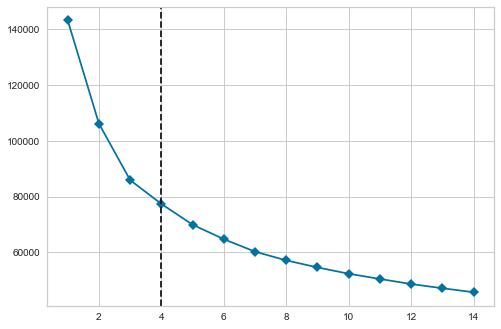

In [172]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
X = df_scaled[features]
kmeans = KMeans(random_state=1)
kmeans_vis = KElbowVisualizer(kmeans, k=(1,15), metric='distortion', timings=False).fit(X)
print('Optimal number of clusters:', kmeans_vis.elbow_value_)

In [173]:
#Optimal küme sayımızın 4 olduğu görülmektedir.

In [174]:
#  Optimum sayıda kümeyi kullanarak müşterileri kümeleyelim
df_scaled['CLUSTERS'] = KMeans(n_clusters=kmeans_vis.elbow_value_, random_state=1).fit_predict(X)

# Her kümedeki müşteri sayısını bulalım
count_clusters = df_scaled.groupby('CLUSTERS').agg({'CUST_ID': 'nunique'})
customers = df_scaled['CUST_ID'].nunique()
count_clusters['Percent_of_Customers'] = (count_clusters['CUST_ID']/customers)*100
count_clusters

,CUST_ID,Percent_of_Customers
CLUSTERS,,
0,1175,13.128492
1,2580,28.826816
2,1565,17.486034
3,3630,40.558659


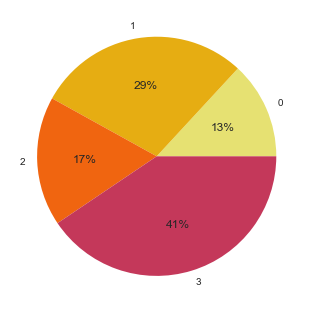

In [175]:
#veriler
data1 = count_clusters['Percent_of_Customers'] 
labels = count_clusters.index

#Seaborn rek paletini kullanalım
colors = sns.color_palette('CMRmap_r')[0:5]

#pasta grafiğini gösterdiğimiz yer
plt.pie(data1, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [176]:
#Yukarıdaki pasta grafiğinde de yaptığımız kümelemeye göre müşteri yüzdelerini görebiliriz

#### Yaptığımız kümelemeyi PCA(Principal Component Analysis) kullanarak boyut küçültme işlemi ile son haline getirelim

### PCA

In [206]:
df_scaled=df_scaled.drop(["CUST_ID"],axis=1)

In [207]:
#Tekrar StandartScaler ile verisetimizi normalleştirelim ve ardından pca yı tanımlayalım

In [209]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
df= ss.fit_transform(df_scaled)

pca= PCA()
pca.fit(df)

PCA()

sum: 1.0


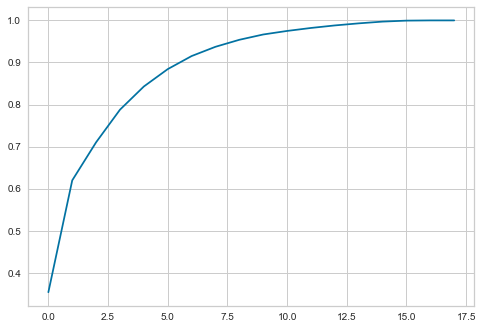

In [210]:
plt.plot(pca.explained_variance_ratio_.cumsum())
#print("varience ratio:",pca.explained_variance_ratio_)
print("sum:",sum(pca.explained_variance_ratio_))

In [211]:
#PCA için 6 tam değişim noktası olduğu için n_components değerini 6 olarak kullanalım.

In [212]:
pca= PCA(n_components=6)
X= pca.fit_transform(df)

In [213]:
df

array([[-1.0899286 , -1.04802301, -0.63661889, ..., -0.64086583,
         0.        ,  1.04638424],
       [ 1.07491251, -0.19484494, -1.13546411, ...,  0.81640027,
         0.        , -0.78095995],
       [ 0.78858655,  0.61663826,  0.28466924, ..., -0.64086583,
         0.        ,  0.13271215],
       ...,
       [-1.15712957, -0.9026555 , -0.52173711, ...,  0.90479906,
         0.        ,  1.04638424],
       [-1.20753669, -0.9026555 , -1.13546411, ...,  0.90479906,
         0.        , -0.78095995],
       [-0.53312581, -1.87649043,  0.5532315 , ..., -0.64086583,
         0.        ,  1.04638424]])

In [214]:
#Bulduğumuz optimum k değeriyle tekrar KMeans algoritmasını fit edelim.

In [215]:
kmeans= KMeans(n_clusters=kmeans_vis.elbow_value_, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
kmeans.fit(X)
labels= kmeans.labels_

In [216]:
df

array([[-1.0899286 , -1.04802301, -0.63661889, ..., -0.64086583,
         0.        ,  1.04638424],
       [ 1.07491251, -0.19484494, -1.13546411, ...,  0.81640027,
         0.        , -0.78095995],
       [ 0.78858655,  0.61663826,  0.28466924, ..., -0.64086583,
         0.        ,  0.13271215],
       ...,
       [-1.15712957, -0.9026555 , -0.52173711, ...,  0.90479906,
         0.        ,  1.04638424],
       [-1.20753669, -0.9026555 , -1.13546411, ...,  0.90479906,
         0.        , -0.78095995],
       [-0.53312581, -1.87649043,  0.5532315 , ..., -0.64086583,
         0.        ,  1.04638424]])

In [217]:
#Tekrar bir boyut küçültme için n_component sayısı belirleyelim.Bu defa 2 alalım

In [218]:
pca= PCA(n_components=2)
X2= pca.fit_transform(df)

In [219]:
X2

array([[-0.00627084, -3.19620053],
       [ 3.69308932,  1.15703472],
       [-1.08368096,  0.80715507],
       ...,
       [-1.3457747 , -3.06254272],
       [ 2.06797475, -3.05371981],
       [-0.59663058, -0.86897518]])

In [220]:
pca_df = pd.DataFrame(data=X2, columns=['pca1','pca2'])
pca_df['labels']= labels
pca_df.head()

,pca1,pca2,labels
0,-0.006271,-3.196201,1
1,3.693089,1.157035,0
2,-1.083681,0.807155,2
3,0.414770,-0.887917,1
4,0.606335,-2.193924,1


In [ ]:
#Aşağıda Müşterilerin PCA'a göre labels adlarına göre kümelenmelerini görüyoruz.

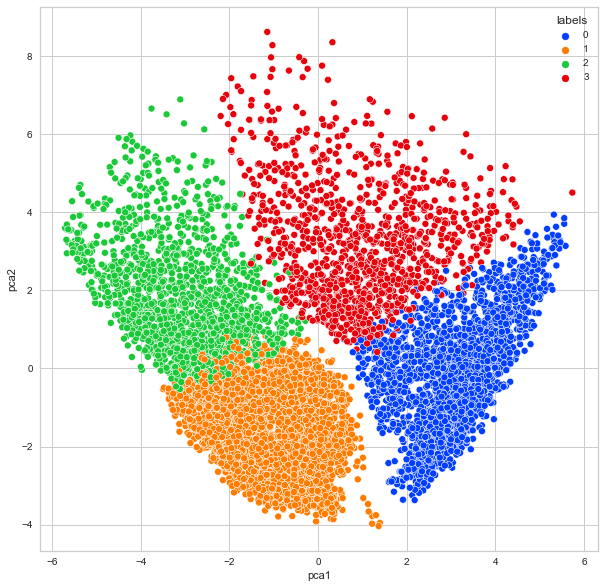

In [221]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='bright')

In [222]:
kmeans= KMeans(n_clusters=3, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
kmeans.fit(X)
labels= kmeans.labels_

In [223]:
pca= PCA(n_components=2)
X2= pca.fit_transform(df)

In [224]:
pca_df = pd.DataFrame(data=X2, columns=['pca1','pca2'])
pca_df['labels']= labels
pca_df.head()

,pca1,pca2,labels
0,-0.006271,-3.196201,1
1,3.693089,1.157035,2
2,-1.083681,0.807155,0
3,0.414770,-0.887917,1
4,0.606335,-2.193924,1


In [ ]:
#PCA ya bağlı kümeleyi görmekteyiz

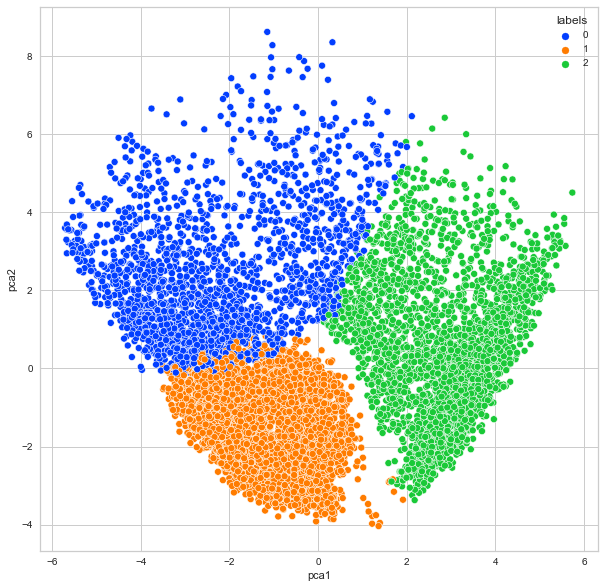

In [225]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='bright')

In [234]:
#Bunları kullanımımıza göre 3 veya daha farklı sayılarda  küme kullanarak gruplayabiliriz.